In [1]:
import numpy as np
import matplotlib.pyplot as plt
import distributions.priors as priors
import getdist
from getdist import plots, MCSamples
import ndes.ndes as ndes
import delfi.delfi as delfi
import tensorflow as tf
%matplotlib inline

In [2]:
# Set up and load in data and simulations...

# Fiducial parameters about which data compression was performed
theta_fiducial = np.array([0.3, 0.8, 0.05, 0.70, 0.96])

# Set up the truncated Gaussian prior...

# Prior parameter boundaries
lower = np.array([0, 0.4, 0, 0.4, 0.7])
upper = np.array([1, 1.2, 0.1, 1.0, 1.3])

# Prior mean and covariance
prior_mean = np.array([0.3, 0.8, 0.05, 0.70, 0.96])
Q = np.eye(5)*np.array([0.1, 0.1, 0.05, 0.3, 0.3])**2

# Create prior over parameters
prior = priors.TruncatedGaussian(prior_mean, Q, lower, upper)

# Import data summaries, simulated data summaries and corresponding parameters, and inverse Fisher matrix...

# NOTE: The compressed summaries should be in the form of pseudo maximum-likelihood parameter estimators
# ie, if you are using the score of an approximate log-likelihood L, you should use compressed summaries
# t = \theta_\mathrm{fiducial} + F^{-1}\nabla L where F is the approximate Fisher matrix

# Compressed data vector
#data = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/compressed_data.dat')
data = np.load("simulators/cosmic_shear/pre_ran_sims/IMNN_real_data.npy")

# Parameters at which sims were ran
#sim_params = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/simulations_parameters.dat')
sim_params = np.load("simulators/cosmic_shear/pre_ran_sims/IMNN_parameters.npy")

# Compressed data for each simulation (corresponding to parameters above)
#sim_data = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/simulations_data.dat')
sim_data = np.load("simulators/cosmic_shear/pre_ran_sims/IMNN_compressed_summaries.npy")

# Inverse Fisher matrix: this can be a bit rough, no biggie
#Finv = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/Finv.dat')
Finv = np.load("simulators/cosmic_shear/pre_ran_sims/IMNN_Finv.npy")

In [10]:
# Set up the Delfi object...

# Create the neural density estimator (MAF stands for Masked Autoregressive Flow)
# NOTE: n_inputs = number of parameters, n_outputs = number of compressed summaries
MAF = ndes.ConditionalMaskedAutoregressiveFlow(n_inputs=5, n_outputs=5, n_hiddens=[50,50], 
                                               n_mades=5, act_fun=tf.tanh)

# Create the DELFI object
DelfiMAF = delfi.Delfi(data, prior, MAF, Finv, theta_fiducial, 
                       param_limits = [lower, upper],
                       param_names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s'], 
                       results_dir = "simulators/cosmic_shear/results_preran/maf")

# Load in the simulations
DelfiMAF.load_simulations(sim_data, sim_params)




Sample parameters:   0%|          | 0/50000 [00:00<?, ?it/s]


Sample parameters:   3%|▎         | 1696/50000 [00:00<00:02, 16957.71it/s]




Generating fisher pre-training data...


Sample parameters:   7%|▋         | 3382/50000 [00:00<00:02, 16925.93it/s]


Sample parameters:  10%|█         | 5037/50000 [00:00<00:02, 16810.80it/s]


Sample parameters:  14%|█▍        | 7227/50000 [00:00<00:02, 18069.99it/s]


Sample parameters:  19%|█▊        | 9326/50000 [00:00<00:02, 18856.72it/s]


Sample parameters:  23%|██▎       | 11676/50000 [00:00<00:01, 20044.05it/s]


Sample parameters:  28%|██▊       | 14153/50000 [00:00<00:01, 21260.51it/s]


Sample parameters:  32%|███▏      | 16245/50000 [00:00<00:01, 21156.79it/s]


Sample parameters:  37%|███▋      | 18297/50000 [00:00<00:01, 19283.57it/s]


Sample parameters:  40%|████      | 20213/50000 [00:01<00:01, 18228.85it/s]


Sample parameters:  45%|████▌     | 22710/50000 [00:01<00:01, 19834.37it/s]


Sample parameters:  51%|█████     | 25308/50000 [00:01<00:01, 21348.82it/s]


Sample parameters:  56%|█████▌    | 28003/50000 [00:01<00:00, 22766.94it/s]


Sample parameters:  61%|██████▏   | 30703/50000 [00:01<00:00, 23889.

Training the neural density estimator...





Epochs:   0%|          | 0/100 [00:04<?, ?it/s, train_loss=16.2, val_loss=16.3]


Epochs:   1%|          | 1/100 [00:04<07:31,  4.56s/it, train_loss=16.2, val_loss=16.3]


Epochs:   1%|          | 1/100 [00:08<07:31,  4.56s/it, train_loss=14.1, val_loss=14.2]


Epochs:   2%|▏         | 2/100 [00:08<07:09,  4.39s/it, train_loss=14.1, val_loss=14.2]


Epochs:   2%|▏         | 2/100 [00:12<07:09,  4.39s/it, train_loss=13.6, val_loss=13.6]


Epochs:   3%|▎         | 3/100 [00:12<06:51,  4.24s/it, train_loss=13.6, val_loss=13.6]


Epochs:   3%|▎         | 3/100 [00:16<06:51,  4.24s/it, train_loss=13.3, val_loss=13.3]


Epochs:   4%|▍         | 4/100 [00:16<06:38,  4.15s/it, train_loss=13.3, val_loss=13.3]


Epochs:   4%|▍         | 4/100 [00:20<06:38,  4.15s/it, train_loss=13, val_loss=13.1]  


Epochs:   5%|▌         | 5/100 [00:20<06:27,  4.08s/it, train_loss=13, val_loss=13.1]


Epochs:   5%|▌         | 5/100 [00:24<06:27,  4.08s/it, train_loss=12.6, val_loss=12.7]


Epochs:   6%|▌   

Epochs:  41%|████      | 41/100 [02:40<03:42,  3.78s/it, train_loss=6.95, val_loss=7.12]


Epochs:  42%|████▏     | 42/100 [02:40<03:39,  3.79s/it, train_loss=6.95, val_loss=7.12]


Epochs:  42%|████▏     | 42/100 [02:44<03:39,  3.79s/it, train_loss=7.08, val_loss=7.26]


Epochs:  43%|████▎     | 43/100 [02:44<03:34,  3.77s/it, train_loss=7.08, val_loss=7.26]


Epochs:  43%|████▎     | 43/100 [02:47<03:34,  3.77s/it, train_loss=6.98, val_loss=7.12]


Epochs:  44%|████▍     | 44/100 [02:47<03:28,  3.72s/it, train_loss=6.98, val_loss=7.12]


Epochs:  44%|████▍     | 44/100 [02:51<03:28,  3.72s/it, train_loss=6.96, val_loss=7.14]


Epochs:  45%|████▌     | 45/100 [02:51<03:23,  3.70s/it, train_loss=6.96, val_loss=7.14]


Epochs:  45%|████▌     | 45/100 [02:55<03:23,  3.70s/it, train_loss=6.93, val_loss=7.1] 


Epochs:  46%|████▌     | 46/100 [02:55<03:20,  3.71s/it, train_loss=6.93, val_loss=7.1]


Epochs:  46%|████▌     | 46/100 [02:58<03:20,  3.71s/it, train_loss=6.92, val_loss=7.09]




Training finished
Best epoch 00068, Val_loss: 7.0176
INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/maftmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/maftmp_model


Done.
Sampling approximate posterior...
Done.
Plotting the posterior (1D and 2D marginals)...
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Saving simulators/cosmic_shear/results_preran/maffisher_pretrain_post.pdf


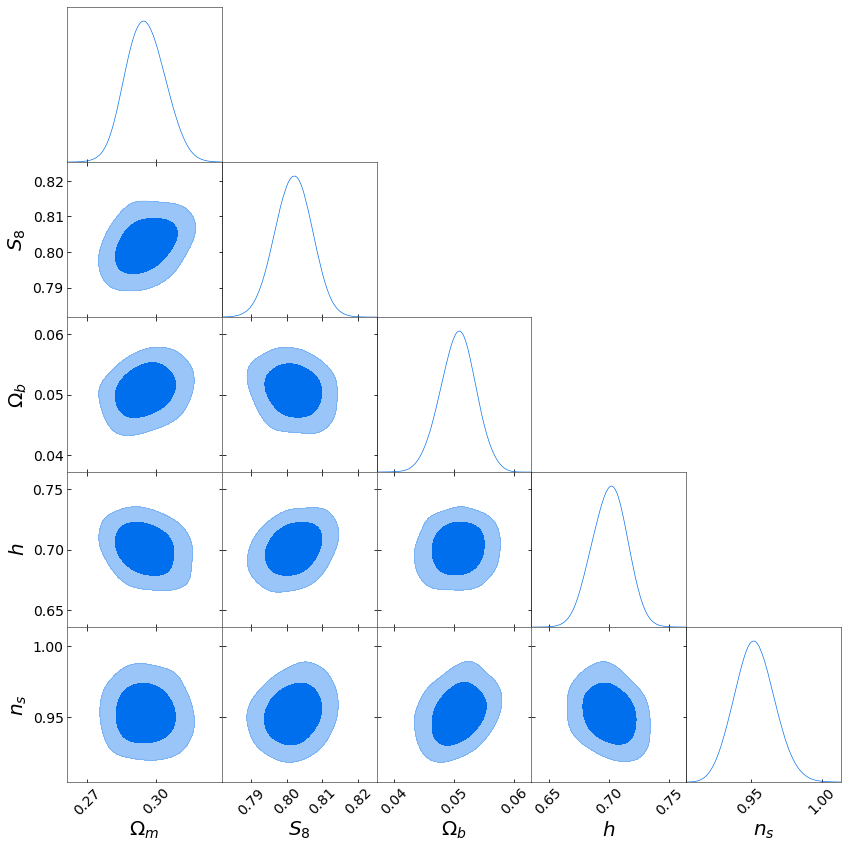

In [11]:
# Do the Fisher pre-training step to inirialize the network
DelfiMAF.fisher_pretraining(50000, prior, epochs=100, patience=10)





Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Training the neural density estimator...






Epochs:   0%|          | 0/100 [00:00<?, ?it/s, train_loss=534, val_loss=535]



Epochs:   1%|          | 1/100 [00:00<01:36,  1.02it/s, train_loss=534, val_loss=535]



Epochs:   1%|          | 1/100 [00:01<01:36,  1.02it/s, train_loss=294, val_loss=302]



Epochs:   2%|▏         | 2/100 [00:01<01:33,  1.05it/s, train_loss=294, val_loss=302]



Epochs:   2%|▏         | 2/100 [00:02<01:33,  1.05it/s, train_loss=202, val_loss=207]



Epochs:   3%|▎         | 3/100 [00:02<01:31,  1.06it/s, train_loss=202, val_loss=207]



Epochs:   3%|▎         | 3/100 [00:03<01:31,  1.06it/s, train_loss=155, val_loss=159]



Epochs:   4%|▍         | 4/100 [00:03<01:28,  1.08it/s, train_loss=155, val_loss=159]



Epochs:   4%|▍         | 4/100 [00:04<01:28,  1.08it/s, train_loss=126, val_loss=130]



Epochs:   5%|▌         | 5/100 [00:04<01:28,  1.08it/s, train_loss=126, val_loss=130]



Epochs:   5%|▌         | 5/100 [00:05<01:28,  1.08it/s, train_loss=107, val_loss=110]



Epochs:   6%|▌         | 

Epochs:  40%|████      | 40/100 [00:37<00:55,  1.07it/s, train_loss=33, val_loss=33.3]



Epochs:  40%|████      | 40/100 [00:37<00:55,  1.07it/s, train_loss=32.9, val_loss=33.1]



Epochs:  41%|████      | 41/100 [00:38<00:54,  1.08it/s, train_loss=32.9, val_loss=33.1]



Epochs:  41%|████      | 41/100 [00:38<00:54,  1.08it/s, train_loss=32.7, val_loss=32.9]



Epochs:  42%|████▏     | 42/100 [00:39<00:54,  1.07it/s, train_loss=32.7, val_loss=32.9]



Epochs:  42%|████▏     | 42/100 [00:39<00:54,  1.07it/s, train_loss=32.7, val_loss=32.8]



Epochs:  43%|████▎     | 43/100 [00:39<00:53,  1.07it/s, train_loss=32.7, val_loss=32.8]



Epochs:  43%|████▎     | 43/100 [00:40<00:53,  1.07it/s, train_loss=32.6, val_loss=32.8]



Epochs:  44%|████▍     | 44/100 [00:40<00:52,  1.07it/s, train_loss=32.6, val_loss=32.8]



Epochs:  44%|████▍     | 44/100 [00:41<00:52,  1.07it/s, train_loss=32.5, val_loss=32.7]



Epochs:  45%|████▌     | 45/100 [00:41<00:50,  1.08it/s, train_loss=32.5, val_loss

Epochs:  79%|███████▉  | 79/100 [01:13<00:19,  1.09it/s, train_loss=30.9, val_loss=31.2]



Epochs:  80%|████████  | 80/100 [01:13<00:18,  1.07it/s, train_loss=30.9, val_loss=31.2]



Epochs:  80%|████████  | 80/100 [01:14<00:18,  1.07it/s, train_loss=30.9, val_loss=31.1]



Epochs:  81%|████████  | 81/100 [01:14<00:18,  1.05it/s, train_loss=30.9, val_loss=31.1]



Epochs:  81%|████████  | 81/100 [01:15<00:18,  1.05it/s, train_loss=30.9, val_loss=31.2]



Epochs:  82%|████████▏ | 82/100 [01:15<00:15,  1.13it/s, train_loss=30.9, val_loss=31.2]



Epochs:  82%|████████▏ | 82/100 [01:16<00:15,  1.13it/s, train_loss=30.9, val_loss=31.1]



Epochs:  83%|████████▎ | 83/100 [01:16<00:15,  1.12it/s, train_loss=30.9, val_loss=31.1]



Epochs:  83%|████████▎ | 83/100 [01:16<00:15,  1.12it/s, train_loss=30.7, val_loss=31]  



Epochs:  84%|████████▍ | 84/100 [01:17<00:14,  1.10it/s, train_loss=30.7, val_loss=31]



Epochs:  84%|████████▍ | 84/100 [01:17<00:14,  1.10it/s, train_loss=30.7, val_loss

Training finished
Best epoch 00098, Val_loss: 30.4330
INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/maftmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/maftmp_model


Sampling approximate posterior...
Done.
Plotting the posterior (1D and 2D marginals)...
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Saving simulators/cosmic_shear/results_preran/mafpost_trained.pdf


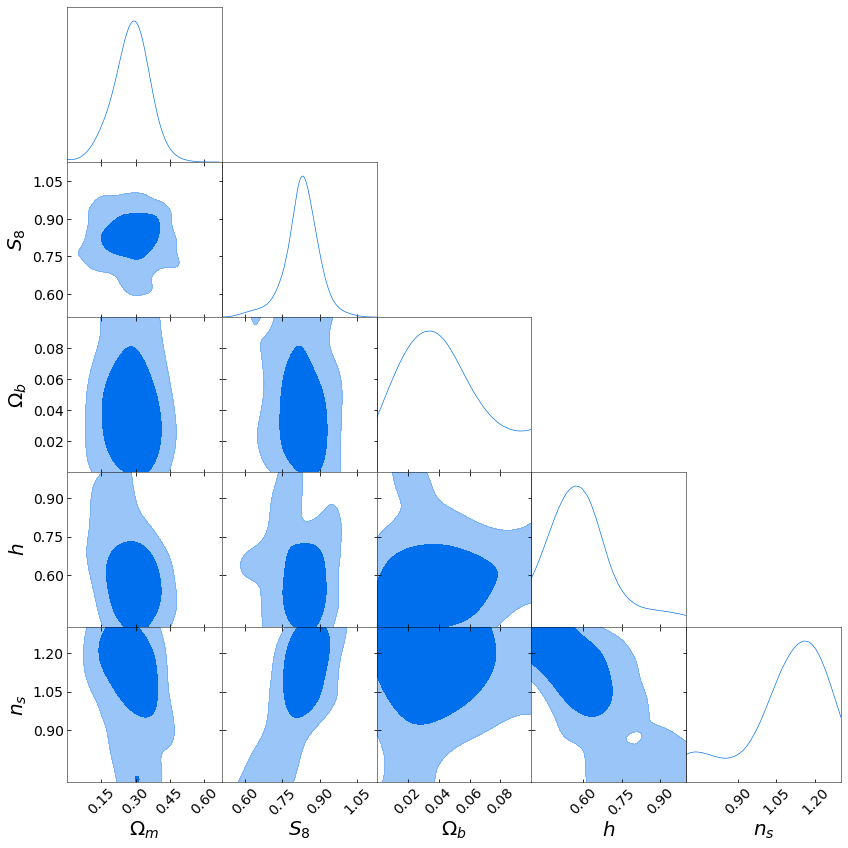

In [12]:
# Train the network
DelfiMAF.train(epochs=100, patience=5, batch_size=100)

In [6]:
# Now let's do the same thing but with a Mixture Density Network instead of a MAF

# Create the neural density estimator (Masked Autoregressive Flow)
# NOTE: n_inputs = number of parameters, n_outputs = number of compressed summaries
# n_components = number of Gaussian components in the MDN (3-5 should be plenty)
MDN = ndes.MixtureDensityNetwork(n_inputs=5, n_outputs=5, n_components=3, 
                                 n_hidden=[50,50], activations=[tf.tanh, tf.tanh])

# Create the DELFI object
DelfiMDN = delfi.Delfi(data, prior, MDN, Finv, theta_fiducial, 
                       param_limits = [lower, upper],
                       param_names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s'], 
                       results_dir = "simulators/cosmic_shear/results_preran/mdn")

# Load in the simulations
DelfiMDN.load_simulations(sim_data, sim_params)



Sample parameters:   0%|          | 0/50000 [00:00<?, ?it/s]

Sample parameters:   3%|▎         | 1563/50000 [00:00<00:03, 15627.78it/s]

Generating fisher pre-training data...




Sample parameters:   6%|▋         | 3191/50000 [00:00<00:02, 15817.52it/s]

Sample parameters:  10%|▉         | 4940/50000 [00:00<00:02, 16283.28it/s]

Sample parameters:  13%|█▎        | 6655/50000 [00:00<00:02, 16532.58it/s]

Sample parameters:  17%|█▋        | 8423/50000 [00:00<00:02, 16858.07it/s]

Sample parameters:  20%|██        | 10113/50000 [00:00<00:02, 16868.79it/s]

Sample parameters:  24%|██▎       | 11873/50000 [00:00<00:02, 17077.43it/s]

Sample parameters:  28%|██▊       | 13968/50000 [00:00<00:01, 18076.64it/s]

Sample parameters:  32%|███▏      | 16054/50000 [00:00<00:01, 18830.26it/s]

Sample parameters:  36%|███▌      | 18054/50000 [00:01<00:01, 19165.15it/s]

Sample parameters:  40%|████      | 20076/50000 [00:01<00:01, 19468.03it/s]

Sample parameters:  45%|████▍     | 22279/50000 [00:01<00:01, 20171.27it/s]

Sample parameters:  50%|████▉     | 24916/50000 [00:01<00:01, 21700.46it/s]

Sample parameters:  55%|█████▌    | 27579/50000 [00:01<00:00, 22976.16it/s]

S

Training the neural density estimator...




Epochs:   0%|          | 0/100 [00:05<?, ?it/s, train_loss=39, val_loss=72.6]

Epochs:   1%|          | 1/100 [00:05<09:23,  5.69s/it, train_loss=39, val_loss=72.6]

Epochs:   1%|          | 1/100 [00:10<09:23,  5.69s/it, train_loss=20.6, val_loss=34.7]

Epochs:   2%|▏         | 2/100 [00:10<09:04,  5.55s/it, train_loss=20.6, val_loss=34.7]

Epochs:   2%|▏         | 2/100 [00:16<09:04,  5.55s/it, train_loss=14.3, val_loss=20.4]

Epochs:   3%|▎         | 3/100 [00:16<08:49,  5.46s/it, train_loss=14.3, val_loss=20.4]

Epochs:   3%|▎         | 3/100 [00:21<08:49,  5.46s/it, train_loss=12.8, val_loss=16.7]

Epochs:   4%|▍         | 4/100 [00:21<08:40,  5.42s/it, train_loss=12.8, val_loss=16.7]

Epochs:   4%|▍         | 4/100 [00:26<08:40,  5.42s/it, train_loss=12.2, val_loss=15.2]

Epochs:   5%|▌         | 5/100 [00:26<08:31,  5.39s/it, train_loss=12.2, val_loss=15.2]

Epochs:   5%|▌         | 5/100 [00:31<08:31,  5.39s/it, train_loss=11.8, val_loss=14.4]

Epochs:   6%|▌         | 6/100 

Epochs:  43%|████▎     | 43/100 [03:45<04:54,  5.17s/it, train_loss=6.79, val_loss=8.18]

Epochs:  43%|████▎     | 43/100 [03:50<04:54,  5.17s/it, train_loss=6.77, val_loss=8.13]

Epochs:  44%|████▍     | 44/100 [03:50<04:48,  5.16s/it, train_loss=6.77, val_loss=8.13]

Epochs:  44%|████▍     | 44/100 [03:55<04:48,  5.16s/it, train_loss=6.69, val_loss=8.04]

Epochs:  45%|████▌     | 45/100 [03:55<04:44,  5.17s/it, train_loss=6.69, val_loss=8.04]

Epochs:  45%|████▌     | 45/100 [04:00<04:44,  5.17s/it, train_loss=6.63, val_loss=7.97]

Epochs:  46%|████▌     | 46/100 [04:00<04:38,  5.16s/it, train_loss=6.63, val_loss=7.97]

Epochs:  46%|████▌     | 46/100 [04:06<04:38,  5.16s/it, train_loss=6.6, val_loss=7.86] 

Epochs:  47%|████▋     | 47/100 [04:06<04:35,  5.20s/it, train_loss=6.6, val_loss=7.86]

Epochs:  47%|████▋     | 47/100 [04:11<04:35,  5.20s/it, train_loss=6.57, val_loss=7.87]

Epochs:  48%|████▊     | 48/100 [04:11<04:30,  5.21s/it, train_loss=6.57, val_loss=7.87]

Epochs:  48

Epochs:  85%|████████▌ | 85/100 [07:28<01:18,  5.23s/it, train_loss=6.06, val_loss=7.19]

Epochs:  86%|████████▌ | 86/100 [07:28<01:12,  5.20s/it, train_loss=6.06, val_loss=7.19]

Epochs:  86%|████████▌ | 86/100 [07:33<01:12,  5.20s/it, train_loss=6.05, val_loss=7.24]

Epochs:  87%|████████▋ | 87/100 [07:33<01:07,  5.20s/it, train_loss=6.05, val_loss=7.24]

Epochs:  87%|████████▋ | 87/100 [07:38<01:07,  5.20s/it, train_loss=6.07, val_loss=7.2] 

Epochs:  88%|████████▊ | 88/100 [07:38<01:02,  5.18s/it, train_loss=6.07, val_loss=7.2]

Epochs:  88%|████████▊ | 88/100 [07:43<01:02,  5.18s/it, train_loss=6.02, val_loss=7.2]

Epochs:  89%|████████▉ | 89/100 [07:43<00:57,  5.19s/it, train_loss=6.02, val_loss=7.2]

Epochs:  89%|████████▉ | 89/100 [07:48<00:57,  5.19s/it, train_loss=6.03, val_loss=7.18]

Epochs:  90%|█████████ | 90/100 [07:48<00:51,  5.16s/it, train_loss=6.03, val_loss=7.18]

Epochs:  90%|█████████ | 90/100 [07:54<00:51,  5.16s/it, train_loss=6.02, val_loss=7.21]

Epochs:  91%|

Training finished
Best epoch 00098, Val_loss: 7.1092
INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/mdntmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/mdntmp_model


Done.
Sampling approximate posterior...
Done.
Plotting the posterior (1D and 2D marginals)...
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Saving simulators/cosmic_shear/results_preran/mdnfisher_pretrain_post.pdf


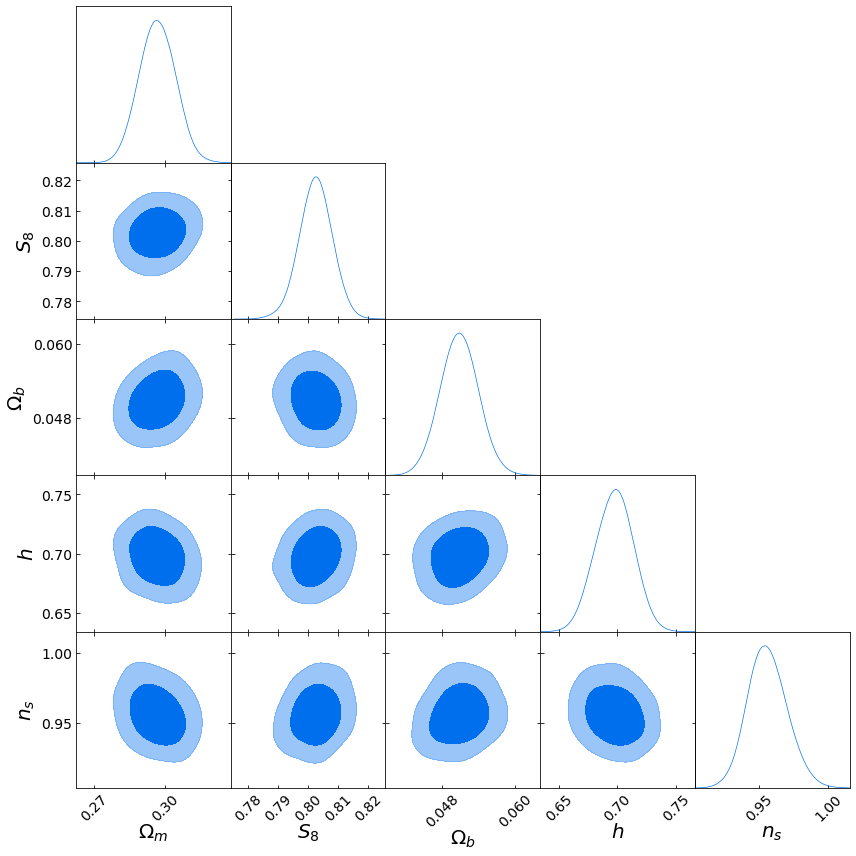

In [7]:
# Do the Fisher pre-training step to inirialize the network
DelfiMDN.fisher_pretraining(50000, prior, epochs=100, patience=10)



Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Training the neural density estimator...




Epochs:   0%|          | 0/100 [00:01<?, ?it/s, train_loss=85.2, val_loss=85.2]

Epochs:   1%|          | 1/100 [00:01<02:16,  1.38s/it, train_loss=85.2, val_loss=85.2]

Epochs:   1%|          | 1/100 [00:02<02:16,  1.38s/it, train_loss=85.2, val_loss=85.2]

Epochs:   2%|▏         | 2/100 [00:02<02:10,  1.33s/it, train_loss=85.2, val_loss=85.2]

Epochs:   2%|▏         | 2/100 [00:03<02:10,  1.33s/it, train_loss=85.2, val_loss=85.2]

Epochs:   3%|▎         | 3/100 [00:03<02:04,  1.29s/it, train_loss=85.2, val_loss=85.2]

Epochs:   3%|▎         | 3/100 [00:05<02:04,  1.29s/it, train_loss=85.2, val_loss=85.2]

Epochs:   4%|▍         | 4/100 [00:05<02:02,  1.27s/it, train_loss=85.2, val_loss=85.2]

Epochs:   4%|▍         | 4/100 [00:06<02:02,  1.27s/it, train_loss=85.2, val_loss=85.2]

Epochs:   5%|▌         | 5/100 [00:06<01:59,  1.25s/it, train_loss=85.2, val_loss=85.2]

Epochs:   5%|▌         | 5/100 [00:07<01:59,  1.25s/it, train_loss=85.2, val_loss=85.2]

Training finished
Best epoch 00004, Val_loss: 85.1956
INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/mdntmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/mdntmp_model


Sampling approximate posterior...
Done.
Plotting the posterior (1D and 2D marginals)...
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Saving simulators/cosmic_shear/results_preran/mdnpost_trained.pdf


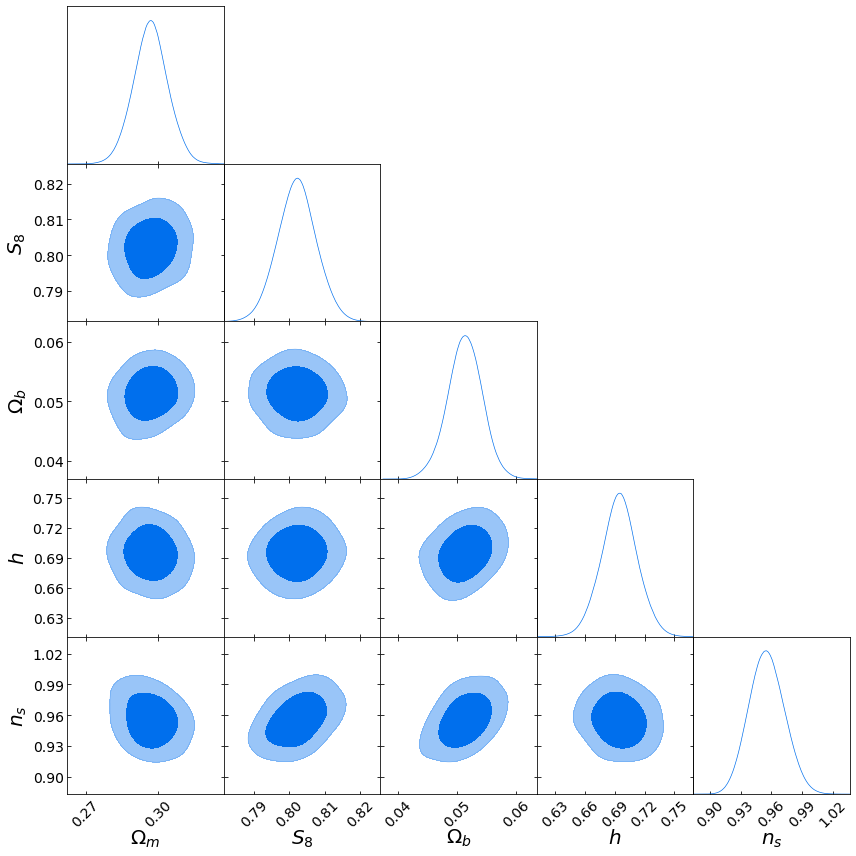

In [8]:
# Train the network
DelfiMDN.train(epochs=100, patience=5, batch_size=100)

In [ ]:
# Let's plot the MAF and MDN posteriors against eachother to check they give the same result

plt.close()
columnwidth = 40 # cm
aspect = 1.67*2
pts_per_inch = 72.27
inch_per_cm = 2.54
width = columnwidth/inch_per_cm
plt.rcParams.update({'figure.figsize': [width, width / aspect],
                 'backend': 'pdf',
                 'font.size': 14,
                 'legend.fontsize': 'small',
                 'legend.frameon': False,
                 'legend.loc': 'best',
                 'lines.markersize': 3,
                 'lines.linewidth': .5,
                 'axes.linewidth': .5,
                 'axes.edgecolor': 'black'})


g = plots.getSubplotPlotter(width_inch = 12)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.lab_fontsize=20

names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s']
labels = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s']
ranges = dict(zip(names, [ [lower[i], upper[i]] for i in range(len(names)) ]))

samples = [DelfiMAF.posterior_samples, DelfiMDN.posterior_samples]
mc_samples = [MCSamples(samples=s, names = names, labels = labels, ranges = ranges) for s in samples]

g.triangle_plot(mc_samples, normalized=True)

for i in range(0, len(names)):
    for j in range(0, i+1):
        ax = g.subplots[i,j]
        xtl = ax.get_xticklabels()
        ax.set_xticklabels(xtl, rotation=45)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

Removed no burn in
Removed no burn in


/home/tomcharnock/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
